poner aristas


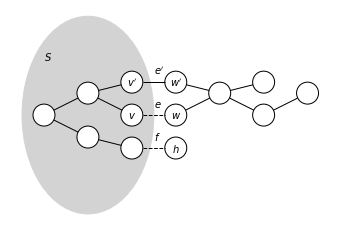

In [43]:
from cmath import atan
from glob import glob
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
from matplotlib.patches import Path
from matplotlib.patches import PathPatch
from matplotlib.patches import Ellipse 
import matplotlib.pyplot as plt
from IPython.display import display
import ipywidgets as widgets
from IPython.display import clear_output
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random 

import math
def inter_points(rad,p1,p2):
    x1,y1 = p1
    x2,y2 = p2 
    phi = math.atan2(y2-y1, x2-x1)
    x = x1 + rad * math.cos(phi)
    y = y1 + rad * math.sin(phi)
    return (x,y)
def punto_medio(p1,p2,s,fra):
    x1,y1 = p1
    x2,y2 = p2 
    dx = x1 - x2 
    dy = y1 - y2 
    ang = (math.pi/2 if dy > 0 else (3*math.pi)/2) if dx == 0 else math.atan(dy/dx)
    ang = ang + 2* math.pi if ang < 0 else ang
    x = math.sqrt((x1- x2)**2 + (y1 - y2)**2)*fra
    y = s 
    xp = x*math.cos(ang) - y*math.sin(ang)
    yp = x*math.sin(ang) + y*math.cos(ang)
    ##llegué a la conclusión que tienes que trasladarlo a el que tiene la menor x 
    xp = xp + (x1 if x1 < x2 else x2) 
    yp = yp + (y1 if x1 < x2 else y2 )
    return (xp,yp)
class Fig1: 
    def poner_vertices(self): 
        self.vert = {1 : (0,0) , 
                     2 : (4,-2) , 3 :(4,2), 
                    4:(8,-3), 5:(8,0), 6:(8,3), 
                    7:(12,-3),8:(12,0),9:(12,3), 
                    10:(16,2),
                    11:(20,0),12:(20,3),
                    13:(24,2)}
        anots = {6:"v'",9:"w'",5:"v",8:"w",7:"h"}
        for i,(x,y) in self.vert.items(): 
            c =Circle((x,y),radius = 1,facecolor = 'white',edgecolor = 'black')
            if i in anots: 
                self.ax.text(x,y,"${}$".format(anots[i]),va = 'center',ha='center')
            self.ax.add_patch(c)
    def poner_aristas(self): 
        ars = [(1,3),(1,2),(2,4),(3,5),(3,6),
               (6,9),(5,8),(9,10),(8,10),
               (10,12),(10,11),(11,13),(4,7)] 
        anots = {(6,9):"e'",(5,8):"e",(4,7):"f"}
        punt = [(5,8),(4,7)]
        for u,v in ars: 
            ux,uy = inter_points(1,self.vert[u],self.vert[v])
            vx,vy = inter_points(1,self.vert[v],self.vert[u])
            ls = "-"
            if((u,v) in punt): 
                ls = "--"
            p = PathPatch(Path([(ux,uy),(vx,vy)]),linestyle = ls)
            if((u,v) in anots): 
                xm,ym = punto_medio(self.vert[u],self.vert[v],0.7,0.5)
                self.ax.text(xm,ym,"${}$".format(anots[(u,v)]))
            self.ax.add_patch(p)
        print("poner aristas")
    def poner_conj_s(self):
        e = Ellipse((4,0),width = 12 , height = 18,color = 'lightgray')
        self.ax.add_patch(e)
        self.ax.text(0,5,"$S$")
    def __init__(self): 
        self.fig,self.ax = plt.subplots()
        self.ax.set_aspect('equal', adjustable='box')
        plt.axis("off")
        self.poner_conj_s() 
        self.poner_vertices() 
        self.poner_aristas() 
        self.ax.relim()
        self.ax.autoscale_view()
f = Fig1() 